In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:

df_pt1 = pd.read_csv('df_final_web_data_pt_1.txt')
df_pt2 = pd.read_csv('df_final_web_data_pt_2.txt')
df_experi = pd.read_csv('df_final_experiment_clients.txt')
df_demo = pd.read_csv('df_final_demo.txt')
pd.set_option('display.max_rows',1000)



In [4]:
df_pt1.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [5]:
df_pt2.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [6]:
# combine original 3 data files: df_pt1 + df_pt2 + final_experiment 
df_12 = pd.concat([df_pt1,df_pt2],ignore_index=True)
df_12

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [7]:
df_experi

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [8]:
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [9]:
df_experi_nonan = df_experi.dropna(subset=['Variation'])
df_experi_nonan.isnull().sum()


client_id    0
Variation    0
dtype: int64

In [10]:
df_experi_nonan

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [11]:
df_merged_12_experi = pd.merge(df_12,df_experi, on='client_id',how='outer')
df_merged_12_experi

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,NaN
1,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,NaN
2,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,NaN
3,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,NaN
4,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,NaN
...,...,...,...,...,...,...
755400,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58,NaN
755401,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47,NaN
755402,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28,NaN
755403,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08,NaN


In [12]:
df_merged_12_experi = pd.merge(df_12,df_experi_nonan, on='client_id',how='inner')
df_merged_12_experi

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
321305,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
321306,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
321307,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [13]:

duplicates = df_merged_12_experi[df_merged_12_experi.duplicated(keep=False)]
duplicates

,client_id,visitor_id,visit_id,process_step,date_time,Variation
361,9358626,148475529_63668223960,223297395_36250329195_832161,start,2017-04-28 12:27:28,Control
362,9358626,148475529_63668223960,223297395_36250329195_832161,start,2017-04-28 12:27:28,Control
364,5376894,622509328_44408201172,688984457_43441834354_912755,start,2017-04-28 14:20:01,Test
365,5376894,622509328_44408201172,688984457_43441834354_912755,start,2017-04-28 14:20:01,Test
379,438567,923318467_50708963627,330543236_29863358529_771432,start,2017-04-28 02:52:29,Test
...,...,...,...,...,...,...
321274,1129748,27929904_9079935779,974922467_42594903952_165673,start,2017-05-08 20:22:19,Control
321275,1129748,27929904_9079935779,974922467_42594903952_165673,start,2017-05-08 20:20:59,Control
321276,1129748,27929904_9079935779,974922467_42594903952_165673,start,2017-05-08 20:20:59,Control
321298,7049106,710348688_12741653529,412278907_8949064401_171038,start,2017-05-20 23:07:09,Test


In [14]:
# totally remove 10764 useless duplicatd rows from above 
df_merged_unique = df_merged_12_experi.drop_duplicates(keep='first')

In [15]:
df_merged_unique

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
321305,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
321306,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
321307,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [16]:
df_merged_unique_demo = pd.merge(df_merged_unique,df_demo, on='client_id',how='inner')
df_merged_unique_demo

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317230,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,10.0,121.0,55.0,U,2.0,153238.83,3.0,6.0
317231,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
317232,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
317233,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0


In [17]:

duplicates2 = df_merged_unique_demo[df_merged_unique_demo.duplicated(keep=False)]
duplicates2

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth


In [18]:
df_merged_unique_demo.isnull().sum()


client_id             0
visitor_id            0
visit_id              0
process_step          0
date_time             0
Variation             0
clnt_tenure_yr      100
clnt_tenure_mnth    100
clnt_age            112
gendr               100
num_accts           100
bal                 100
calls_6_mnth        100
logons_6_mnth       100
dtype: int64

In [19]:
rows_with_nulls = df_merged_unique_demo[df_merged_unique_demo.isnull().any(axis=1)]
rows_with_nulls

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
24845,8191345,944604426_90275839905,820326455_18678690741_410378,confirm,2017-03-22 12:45:19,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24868,8191345,944604426_90275839905,820326455_18678690741_410378,step_3,2017-03-22 12:44:07,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24869,8191345,944604426_90275839905,820326455_18678690741_410378,step_2,2017-03-22 12:43:04,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24870,8191345,944604426_90275839905,820326455_18678690741_410378,step_1,2017-03-22 12:42:57,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24871,8191345,944604426_90275839905,820326455_18678690741_410378,start,2017-03-22 12:42:52,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24872,8191345,944604426_90275839905,820326455_18678690741_410378,start,2017-03-22 12:39:46,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24873,8191345,944604426_90275839905,820326455_18678690741_410378,step_1,2017-03-22 12:39:18,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24874,8191345,944604426_90275839905,820326455_18678690741_410378,start,2017-03-22 12:39:06,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34070,5144725,77028087_25004614436,212833889_61935064865_350020,confirm,2017-04-03 10:17:55,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34072,5144725,439828714_96441655584,823358855_28861549260_454037,confirm,2017-03-29 15:33:25,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_merged_unique_demo['gendr'] = df_merged_unique_demo['gendr'].replace({"X":"Unknown","U":"Unknown"})
df_merged_unique_demo['gendr'].value_counts()

gendr
Unknown    107622
M          106703
F          102810
Name: count, dtype: int64

In [21]:
df_all = df_merged_unique_demo

In [22]:
df_all.head(100)
df_all.dtypes

client_id             int64
visitor_id           object
visit_id             object
process_step         object
date_time            object
Variation            object
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [23]:
# devide above last df into 2 group df( experient and non_experiment group)
df_control = df_merged_unique_demo[df_merged_unique_demo['Variation'] == "Control"].reset_index(drop=True)
df_test = df_merged_unique_demo[df_merged_unique_demo['Variation'] == "Test"].reset_index(drop=True)

In [24]:
df_all['date_time'] = pd.to_datetime(df_all['date_time'])

In [25]:
df_all['date_time'] = pd.to_datetime(df_all['date_time'])

In [26]:
df_all.dtypes

client_id                    int64
visitor_id                  object
visit_id                    object
process_step                object
date_time           datetime64[ns]
Variation                   object
clnt_tenure_yr             float64
clnt_tenure_mnth           float64
clnt_age                   float64
gendr                       object
num_accts                  float64
bal                        float64
calls_6_mnth               float64
logons_6_mnth              float64
dtype: object

In [27]:
df_all

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,Unknown,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,Unknown,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,Unknown,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,Unknown,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,Unknown,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317230,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,10.0,121.0,55.0,Unknown,2.0,153238.83,3.0,6.0
317231,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
317232,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
317233,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0


In [28]:
df_test['date_time'] = pd.to_datetime(df_test['date_time'])

In [29]:
df_test.dtypes

client_id                    int64
visitor_id                  object
visit_id                    object
process_step                object
date_time           datetime64[ns]
Variation                   object
clnt_tenure_yr             float64
clnt_tenure_mnth           float64
clnt_age                   float64
gendr                       object
num_accts                  float64
bal                        float64
calls_6_mnth               float64
logons_6_mnth              float64
dtype: object

In [30]:
df_control['date_time'] = pd.to_datetime(df_control['date_time'])

In [31]:
df_control.dtypes

client_id                    int64
visitor_id                  object
visit_id                    object
process_step                object
date_time           datetime64[ns]
Variation                   object
clnt_tenure_yr             float64
clnt_tenure_mnth           float64
clnt_age                   float64
gendr                       object
num_accts                  float64
bal                        float64
calls_6_mnth               float64
logons_6_mnth              float64
dtype: object

In [32]:
df_control.isnull().sum()

client_id            0
visitor_id           0
visit_id             0
process_step         0
date_time            0
Variation            0
clnt_tenure_yr      42
clnt_tenure_mnth    42
clnt_age            54
gendr               42
num_accts           42
bal                 42
calls_6_mnth        42
logons_6_mnth       42
dtype: int64

In [33]:
# clean non experient group df: remove all those rows(112 rows) which value are null for anyone of below column:
#df_non_expe_cleaned = df_non_expe.dropna(subset=['clnt_tenure_yr','clnt_tenure_mnth','clnt_age','gendr','num_accts','bal','calls_6_mnth','logons_6_mnth'])

In [34]:
# clean experient group df
#df_expe.loc[df_expe['clnt_tenure_mnth']>12,'clnt_tenure_mnth']=df_expe['clnt_tenure_mnth'] % 12

In [35]:
df_control.head(200)

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
1,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
2,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
4,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
5,4033851,762728880_76361333336,949661017_22392791362_127391,step_1,2017-04-05 12:24:12,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
6,4033851,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05 12:24:04,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
7,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:26,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
8,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:10:26,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
9,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:25,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0


In [36]:
df_control_timesort = df_control.sort_values(by=['visit_id', 'date_time'])

In [37]:
df_test_timesort = df_test.sort_values(by=['visit_id', 'date_time'])

In [38]:
df_test_timesort

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
61391,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test,4.0,56.0,59.5,Unknown,2.0,63130.44,6.0,9.0
61390,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test,4.0,56.0,59.5,Unknown,2.0,63130.44,6.0,9.0
136842,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0
136841,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0
136840,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55031,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0
55030,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0
55029,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0
55028,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0


In [39]:
df_control_timesort

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
98112,105007,676020267_36602664238,100030127_47967100085_936361,start,2017-03-22 11:07:49,Control,9.0,118.0,35.0,F,2.0,34897.47,3.0,6.0
11272,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:41:51,Control,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0
11271,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:43:16,Control,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0
11270,5623007,700426174_33289797318,100037962_47432393712_705583,step_1,2017-04-14 16:43:55,Control,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0
11269,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:44:03,Control,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38053,4064969,110735946_42614968419,999985675_64610694964_443659,start,2017-04-20 09:45:18,Control,6.0,75.0,64.5,Unknown,2.0,74783.76,5.0,8.0
38052,4064969,110735946_42614968419,999985675_64610694964_443659,step_1,2017-04-20 09:46:26,Control,6.0,75.0,64.5,Unknown,2.0,74783.76,5.0,8.0
38051,4064969,110735946_42614968419,999985675_64610694964_443659,step_2,2017-04-20 09:47:04,Control,6.0,75.0,64.5,Unknown,2.0,74783.76,5.0,8.0
38050,4064969,110735946_42614968419,999985675_64610694964_443659,step_3,2017-04-20 09:48:45,Control,6.0,75.0,64.5,Unknown,2.0,74783.76,5.0,8.0


In [40]:
#new_df = df_control.groupby("visit_id").agg({"Fare":["mean", "max","min"], "Age": "mean"}).reset_index()


In [41]:
df_control_timesort['time_diff_seconds'] = df_control_timesort.groupby('visit_id')['date_time'].diff().dt.total_seconds()
df_control_timesort

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,time_diff_seconds
98112,105007,676020267_36602664238,100030127_47967100085_936361,start,2017-03-22 11:07:49,Control,9.0,118.0,35.0,F,2.0,34897.47,3.0,6.0,NaN
11272,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:41:51,Control,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,NaN
11271,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:43:16,Control,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,85.0
11270,5623007,700426174_33289797318,100037962_47432393712_705583,step_1,2017-04-14 16:43:55,Control,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,39.0
11269,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:44:03,Control,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38053,4064969,110735946_42614968419,999985675_64610694964_443659,start,2017-04-20 09:45:18,Control,6.0,75.0,64.5,Unknown,2.0,74783.76,5.0,8.0,NaN
38052,4064969,110735946_42614968419,999985675_64610694964_443659,step_1,2017-04-20 09:46:26,Control,6.0,75.0,64.5,Unknown,2.0,74783.76,5.0,8.0,68.0
38051,4064969,110735946_42614968419,999985675_64610694964_443659,step_2,2017-04-20 09:47:04,Control,6.0,75.0,64.5,Unknown,2.0,74783.76,5.0,8.0,38.0
38050,4064969,110735946_42614968419,999985675_64610694964_443659,step_3,2017-04-20 09:48:45,Control,6.0,75.0,64.5,Unknown,2.0,74783.76,5.0,8.0,101.0


In [42]:
df_test_timesort['time_diff_seconds'] = df_test_timesort.groupby('visit_id')['date_time'].diff().dt.total_seconds()
df_test_timesort

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,time_diff_seconds
61391,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test,4.0,56.0,59.5,Unknown,2.0,63130.44,6.0,9.0,NaN
61390,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test,4.0,56.0,59.5,Unknown,2.0,63130.44,6.0,9.0,52.0
136842,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,NaN
136841,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,16.0
136840,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55031,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,NaN
55030,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,11.0
55029,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,54.0
55028,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,44.0


In [43]:
# Shift the time differences down by one to reflect the current row
df_control_timesort['time_spent_seconds'] = df_control_timesort['time_diff_seconds'].shift(-1)

# Optional: If you want to handle the last row, you can fill it with a specific value (e.g., 0 or NaN)
#df_control_timesort['time_spent_seconds'].fillna(0, inplace=True)  # or you can use NaN if preferred


In [44]:
# Shift the time differences down by one to reflect the current row
df_test_timesort['time_spent_seconds'] = df_test_timesort['time_diff_seconds'].shift(-1)

# Optional: If you want to handle the last row, you can fill it with a specific value (e.g., 0 or NaN)
#df_control_timesort['time_spent_seconds'].fillna(0, inplace=True)  # or you can use NaN if preferred


In [45]:
df_test_timesort

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,time_diff_seconds,time_spent_seconds
61391,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test,4.0,56.0,59.5,Unknown,2.0,63130.44,6.0,9.0,NaN,52.0
61390,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test,4.0,56.0,59.5,Unknown,2.0,63130.44,6.0,9.0,52.0,NaN
136842,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,NaN,16.0
136841,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,16.0,9.0
136840,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55031,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,NaN,11.0
55030,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,11.0,54.0
55029,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,54.0,44.0
55028,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,44.0,9.0


In [46]:
# Move 'column_to_move' to the second position (index 1)
column_to_move = df_control_timesort.pop('time_spent_seconds')  # Remove the column
df_control_timesort.insert(5, 'time_spent_seconds', column_to_move)  # Insert it at index 5

In [47]:
# Move 'column_to_move' to the second position (index 1)
column_to_move2 = df_test_timesort.pop('time_spent_seconds')  # Remove the column
df_test_timesort.insert(5, 'time_spent_seconds', column_to_move2)  # Insert it at index 5

In [48]:
df_control_timesort

,client_id,visitor_id,visit_id,process_step,date_time,time_spent_seconds,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,time_diff_seconds
98112,105007,676020267_36602664238,100030127_47967100085_936361,start,2017-03-22 11:07:49,NaN,Control,9.0,118.0,35.0,F,2.0,34897.47,3.0,6.0,NaN
11272,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:41:51,85.0,Control,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,NaN
11271,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:43:16,39.0,Control,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,85.0
11270,5623007,700426174_33289797318,100037962_47432393712_705583,step_1,2017-04-14 16:43:55,8.0,Control,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,39.0
11269,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:44:03,NaN,Control,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38053,4064969,110735946_42614968419,999985675_64610694964_443659,start,2017-04-20 09:45:18,68.0,Control,6.0,75.0,64.5,Unknown,2.0,74783.76,5.0,8.0,NaN
38052,4064969,110735946_42614968419,999985675_64610694964_443659,step_1,2017-04-20 09:46:26,38.0,Control,6.0,75.0,64.5,Unknown,2.0,74783.76,5.0,8.0,68.0
38051,4064969,110735946_42614968419,999985675_64610694964_443659,step_2,2017-04-20 09:47:04,101.0,Control,6.0,75.0,64.5,Unknown,2.0,74783.76,5.0,8.0,38.0
38050,4064969,110735946_42614968419,999985675_64610694964_443659,step_3,2017-04-20 09:48:45,843.0,Control,6.0,75.0,64.5,Unknown,2.0,74783.76,5.0,8.0,101.0


In [49]:
df_test_timesort

,client_id,visitor_id,visit_id,process_step,date_time,time_spent_seconds,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,time_diff_seconds
61391,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,52.0,Test,4.0,56.0,59.5,Unknown,2.0,63130.44,6.0,9.0,NaN
61390,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,NaN,Test,4.0,56.0,59.5,Unknown,2.0,63130.44,6.0,9.0,52.0
136842,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,16.0,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,NaN
136841,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,9.0,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,16.0
136840,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,14.0,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55031,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,11.0,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,NaN
55030,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,54.0,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,11.0
55029,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,44.0,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,54.0
55028,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,9.0,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,44.0


In [50]:
df_control_timesort.groupby('process_step')['time_spent_seconds'].describe()

,count,mean,std,min,25%,50%,75%,max
process_step,,,,,,,,
confirm,1967.0,173.455008,409.976594,0.0,14.0,47.0,142.0,9396.0
start,35739.0,66.800974,286.839566,0.0,9.0,20.0,49.0,40235.0
step_1,26046.0,50.506565,153.515767,0.0,9.0,20.0,47.0,10286.0
step_2,24314.0,92.018343,181.154552,0.0,33.0,64.0,112.0,21763.0
step_3,20281.0,137.224496,213.034533,0.0,39.0,72.0,145.0,6164.0


In [51]:
df_test_timesort.groupby('process_step')['time_spent_seconds'].describe()

,count,mean,std,min,25%,50%,75%,max
process_step,,,,,,,,
confirm,4150.0,245.674458,450.052583,0.0,42.0,94.0,239.75,14581.0
start,46326.0,61.488624,215.205719,0.0,7.0,14.0,44.00,24819.0
step_1,35529.0,60.765065,144.111165,0.0,13.0,27.0,56.00,8797.0
step_2,29574.0,88.874112,134.851495,0.0,33.0,61.0,103.00,11204.0
step_3,23984.0,129.607488,223.221890,0.0,31.0,58.0,127.00,6692.0


C:\Users\JimiH\AppData\Local\Temp\ipykernel_30372\3791144482.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_control_timesort, x='process_step', y='time_spent_seconds', palette="coolwarm")


<Axes: xlabel='process_step', ylabel='time_spent_seconds'>

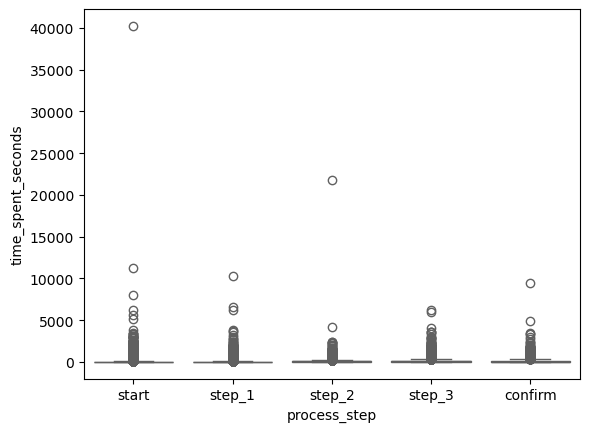

In [52]:
sns.boxplot(data=df_control_timesort, x='process_step', y='time_spent_seconds', palette="coolwarm")

C:\Users\JimiH\AppData\Local\Temp\ipykernel_30372\1752048696.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test_timesort, x='process_step', y='time_spent_seconds', palette="coolwarm")


<Axes: xlabel='process_step', ylabel='time_spent_seconds'>

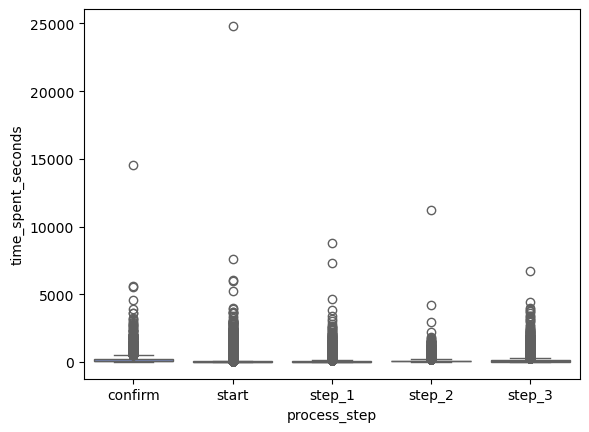

In [53]:
sns.boxplot(data=df_test_timesort, x='process_step', y='time_spent_seconds', palette="coolwarm")

In [54]:
def turkeys_test_outliers(my_data, column_name, method="show"):
    # Ensure that the input is a DataFrame and access specific column
    data = my_data[column_name].copy()
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = (data < lower_bound) | (data > upper_bound)

    if method == "show":
        return data[outliers]  # This shows the outliers
    elif method == "replace":
        median = data.median()
        data[outliers] = median  # Replace outliers with median
        my_data[column_name] = data  # Update the DataFrame
        return my_data  # Return modified DataFrame
    elif method == "delete":
        # Filter the DataFrame to keep non-outlier rows
        data_no_outliers = my_data[~outliers]  # Keep rows that are not outliers
        return data_no_outliers  # Return DataFrame without outliers


In [55]:
turkeys_test_outliers(df_control_timesort,'time_spent_seconds')

99407     249.0
135730    327.0
24581     329.0
29113     427.0
29111     226.0
          ...  
37398     264.0
2353      340.0
59561     260.0
59558     211.0
38050     843.0
Name: time_spent_seconds, Length: 9852, dtype: float64

In [56]:
df_control_timesort_no_outliers = turkeys_test_outliers(df_control_timesort,'time_spent_seconds', method = 'delete')

In [57]:
df_control_timesort_no_outliers

,client_id,visitor_id,visit_id,process_step,date_time,time_spent_seconds,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,time_diff_seconds
98112,105007,676020267_36602664238,100030127_47967100085_936361,start,2017-03-22 11:07:49,NaN,Control,9.0,118.0,35.0,F,2.0,34897.47,3.0,6.0,NaN
11272,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:41:51,85.0,Control,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,NaN
11271,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:43:16,39.0,Control,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,85.0
11270,5623007,700426174_33289797318,100037962_47432393712_705583,step_1,2017-04-14 16:43:55,8.0,Control,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,39.0
11269,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:44:03,NaN,Control,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53870,9512888,735113752_39198257069,999951892_54774917180_163890,start,2017-04-07 11:21:01,NaN,Control,13.0,166.0,39.0,M,2.0,45730.25,2.0,5.0,NaN
38053,4064969,110735946_42614968419,999985675_64610694964_443659,start,2017-04-20 09:45:18,68.0,Control,6.0,75.0,64.5,Unknown,2.0,74783.76,5.0,8.0,NaN
38052,4064969,110735946_42614968419,999985675_64610694964_443659,step_1,2017-04-20 09:46:26,38.0,Control,6.0,75.0,64.5,Unknown,2.0,74783.76,5.0,8.0,68.0
38051,4064969,110735946_42614968419,999985675_64610694964_443659,step_2,2017-04-20 09:47:04,101.0,Control,6.0,75.0,64.5,Unknown,2.0,74783.76,5.0,8.0,38.0


In [58]:
df_test_timesort

,client_id,visitor_id,visit_id,process_step,date_time,time_spent_seconds,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,time_diff_seconds
61391,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,52.0,Test,4.0,56.0,59.5,Unknown,2.0,63130.44,6.0,9.0,NaN
61390,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,NaN,Test,4.0,56.0,59.5,Unknown,2.0,63130.44,6.0,9.0,52.0
136842,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,16.0,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,NaN
136841,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,9.0,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,16.0
136840,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,14.0,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55031,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,11.0,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,NaN
55030,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,54.0,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,11.0
55029,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,44.0,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,54.0
55028,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,9.0,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,44.0


In [59]:
df_test_timesort_no_outliers = turkeys_test_outliers(df_test_timesort,'time_spent_seconds', method = 'delete')

In [60]:
df_test_timesort_no_outliers

,client_id,visitor_id,visit_id,process_step,date_time,time_spent_seconds,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,time_diff_seconds
61391,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,52.0,Test,4.0,56.0,59.5,Unknown,2.0,63130.44,6.0,9.0,NaN
61390,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,NaN,Test,4.0,56.0,59.5,Unknown,2.0,63130.44,6.0,9.0,52.0
136842,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,16.0,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,NaN
136841,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,9.0,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,16.0
136840,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,14.0,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55031,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,11.0,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,NaN
55030,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,54.0,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,11.0
55029,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,44.0,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,54.0
55028,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,9.0,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,44.0


C:\Users\JimiH\AppData\Local\Temp\ipykernel_30372\4003607098.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_control_timesort_no_outliers, x='process_step', y='time_spent_seconds', palette="coolwarm", order=order)


<Axes: xlabel='process_step', ylabel='time_spent_seconds'>

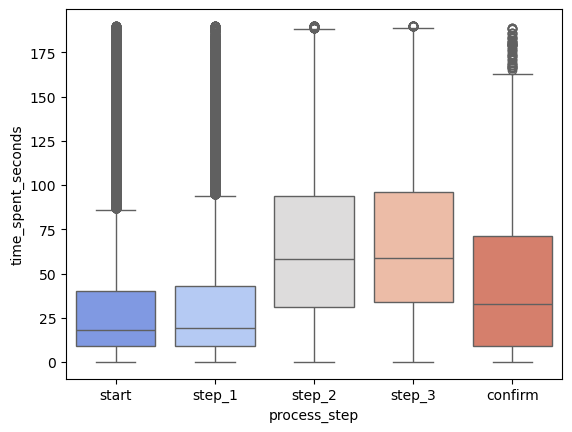

In [61]:
# Define the desired order of process steps
order = ['start','step_1', 'step_2', 'step_3','confirm']

sns.boxplot(data=df_control_timesort_no_outliers, x='process_step', y='time_spent_seconds', palette="coolwarm", order=order)


C:\Users\JimiH\AppData\Local\Temp\ipykernel_30372\560995297.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test_timesort_no_outliers, x='process_step', y='time_spent_seconds', palette="coolwarm", order=order)


<Axes: xlabel='process_step', ylabel='time_spent_seconds'>

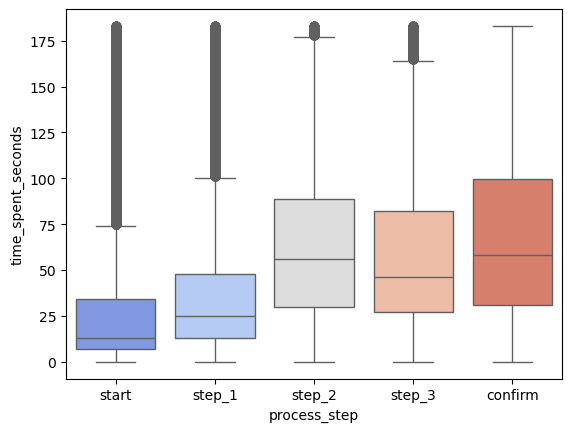

In [62]:
sns.boxplot(data=df_test_timesort_no_outliers, x='process_step', y='time_spent_seconds', palette="coolwarm", order=order)

C:\Users\JimiH\AppData\Local\Temp\ipykernel_30372\2279356328.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test_timesort_no_outliers, x='process_step', y='time_spent_seconds', palette="coolwarm", order=order)
C:\Users\JimiH\AppData\Local\Temp\ipykernel_30372\2279356328.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_control_timesort_no_outliers, x='process_step', y='time_spent_seconds', palette="coolwarm", order=order)


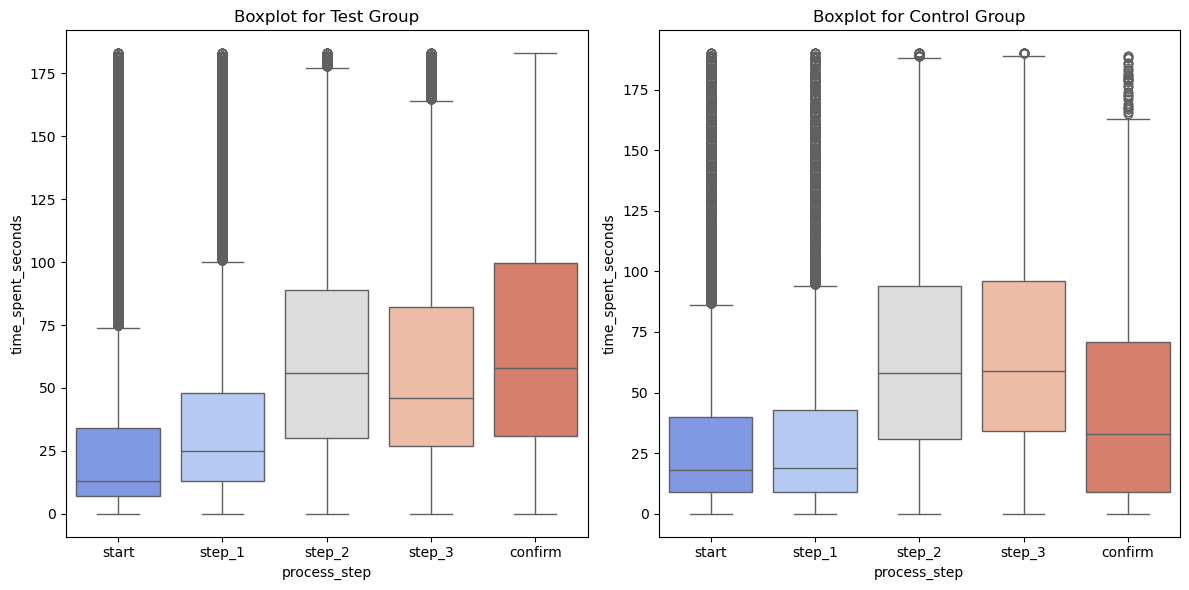

In [63]:
# Set up the Matplotlib figure with subplots
plt.figure(figsize=(12, 6))

# Create the first boxplot in the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(data=df_test_timesort_no_outliers, x='process_step', y='time_spent_seconds', palette="coolwarm", order=order)
plt.title('Boxplot for Test Group')

# Create the second boxplot in the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(data=df_control_timesort_no_outliers, x='process_step', y='time_spent_seconds', palette="coolwarm", order=order)
plt.title('Boxplot for Control Group')

# Show the plots
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [64]:
df_control_timesort_no_outliers.groupby('process_step')['time_spent_seconds'].describe()

,count,mean,std,min,25%,50%,75%,max
process_step,,,,,,,,
confirm,1576.0,47.199873,47.012650,0.0,9.0,33.0,71.0,189.0
start,33269.0,31.187742,34.584140,0.0,9.0,18.0,40.0,190.0
step_1,25028.0,31.908223,34.104078,0.0,9.0,19.0,43.0,190.0
step_2,22057.0,65.809448,45.388924,0.0,31.0,58.0,94.0,190.0
step_3,16565.0,68.708602,44.806382,0.0,34.0,59.0,96.0,190.0


In [65]:
df_test_timesort_no_outliers.groupby('process_step')['time_spent_seconds'].describe()

,count,mean,std,min,25%,50%,75%,max
process_step,,,,,,,,
confirm,2870.0,68.274216,46.806400,0.0,31.0,58.0,99.75,183.0
start,43257.0,28.258548,35.710742,0.0,7.0,13.0,34.00,183.0
step_1,33316.0,36.584704,34.817606,0.0,13.0,25.0,48.00,183.0
step_2,26957.0,62.626479,42.679079,0.0,30.0,56.0,89.00,183.0
step_3,19860.0,59.343303,41.680331,0.0,27.0,46.0,82.00,183.0


In [66]:
mean_control = df_control_timesort_no_outliers.groupby('process_step')['time_spent_seconds'].mean().reset_index()

In [67]:
mean_control

,process_step,time_spent_seconds
0,confirm,47.199873
1,start,31.187742
2,step_1,31.908223
3,step_2,65.809448
4,step_3,68.708602


In [68]:
mean_test = df_test_timesort_no_outliers.groupby('process_step')['time_spent_seconds'].mean().reset_index()

In [69]:
mean_test

,process_step,time_spent_seconds
0,confirm,68.274216
1,start,28.258548
2,step_1,36.584704
3,step_2,62.626479
4,step_3,59.343303


In [70]:
mean_control['Group'] = 'Control'
mean_test['Group'] = 'Test'


In [71]:
combined_df = pd.concat([mean_test, mean_control])

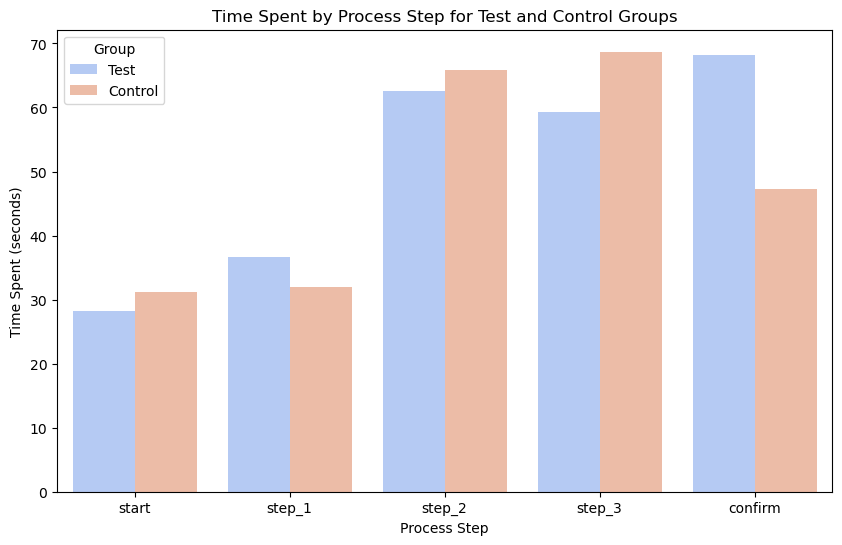

In [72]:
order = ['start','step_1', 'step_2', 'step_3','confirm']


# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x='process_step', y='time_spent_seconds', hue='Group', palette='coolwarm', order = order)

# Add titles and labels
plt.title('Time Spent by Process Step for Test and Control Groups')
plt.xlabel('Process Step')
plt.ylabel('Time Spent (seconds)')

# Show the plot
plt.legend(title='Group')
plt.show()


In [73]:
median_control = df_control_timesort_no_outliers.groupby('process_step')['time_spent_seconds'].median().reset_index()
median_test = df_test_timesort_no_outliers.groupby('process_step')['time_spent_seconds'].median().reset_index()

In [74]:
median_control['Group'] = 'Control'
median_test['Group'] = 'Test'
combined_median = pd.concat([median_test, median_control])

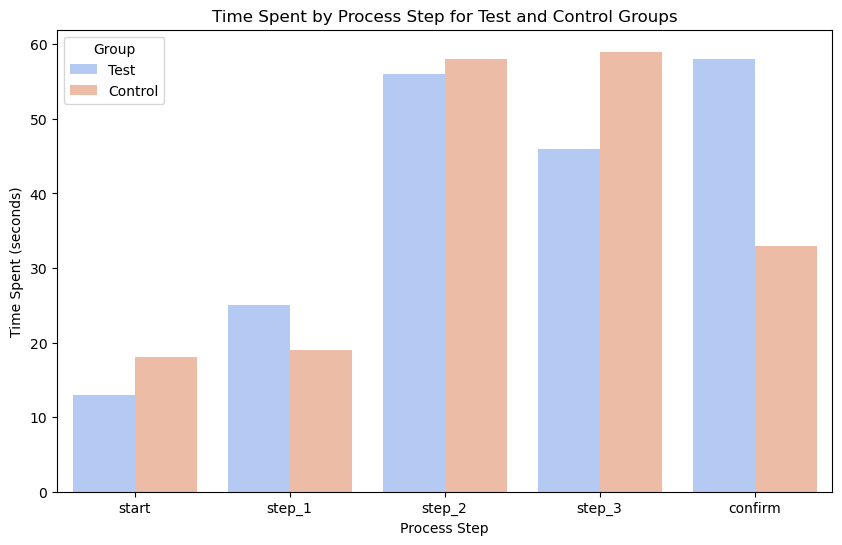

In [75]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_median, x='process_step', y='time_spent_seconds', hue='Group', palette='coolwarm', order = order)

# Add titles and labels
plt.title('Time Spent by Process Step for Test and Control Groups')
plt.xlabel('Process Step')
plt.ylabel('Time Spent (seconds)')

# Show the plot
plt.legend(title='Group')
plt.show()


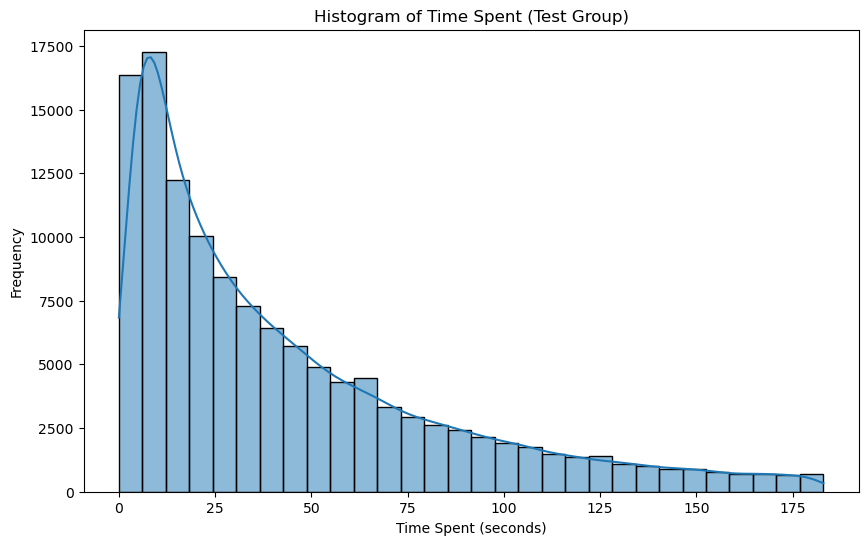

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_test_timesort_no_outliers['time_spent_seconds'], bins=30, kde=True)
plt.title('Histogram of Time Spent (Test Group)')
plt.xlabel('Time Spent (seconds)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
"""
# Assuming df_control_timesort is your sorted DataFrame
df_control_timesort['time_diff_seconds'] = df_control_timesort.groupby('visit_id')['date_time'].diff().dt.total_seconds()

# Updated function to format time difference
def format_time_diff(seconds):
    if pd.isna(seconds):  # If it's NaN, return a placeholder
        return 'N/A'
    
    # Calculate hours, minutes, and seconds
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    remaining_seconds = int(seconds % 60)
    
    # Construct the formatted string
    parts = []
    if hours > 0:
        parts.append(f"{hours} hour{'s' if hours > 1 else ''}")
    if minutes > 0:
        parts.append(f"{minutes} minute{'s' if minutes > 1 else ''}")
    if remaining_seconds > 0:
        parts.append(f"{remaining_seconds} second{'s' if remaining_seconds > 1 else ''}")

    return ' and '.join(parts) if parts else '0 seconds'

# Apply the function to create a new column with formatted time differences
df_control_timesort['formatted_time_diff'] = df_control_timesort['time_diff_seconds'].apply(format_time_diff)
"""